In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [116]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [156]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.show()

In [157]:
tesla = yf.Ticker("TSLA")

In [158]:
tesla_data = tesla.history(period="max")

In [159]:
tesla_data.reset_index(inplace=True)

In [160]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [161]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [162]:
html_data  = requests.get(url).text

In [163]:
soup=BeautifulSoup(html_data, 'html5lib')

In [164]:
# Read all tables found within the webpage
tables = pd.read_html(url)
tesla_revenue = tables[1]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ["Date", "Revenue"]


In [165]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [166]:
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3505,2024-06-03 00:00:00-04:00,178.130005,182.639999,174.490005,176.289993,68568900,0.0,0.0
3506,2024-06-04 00:00:00-04:00,174.779999,177.759995,174.000000,174.770004,60056300,0.0,0.0
3507,2024-06-05 00:00:00-04:00,175.350006,176.149994,172.130005,175.000000,57953800,0.0,0.0
3508,2024-06-06 00:00:00-04:00,174.600006,179.729996,172.729996,177.940002,69887000,0.0,0.0
3509,2024-06-07 00:00:00-04:00,176.130005,179.350006,175.580002,177.479996,56161300,0.0,0.0


In [167]:
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")

In [168]:
gme_data.reset_index(inplace=True)

In [169]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [170]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data= requests.get(url).text

In [171]:
# Read all tables found within the webpage
tables = pd.read_html(url)
gme_revenue = tables[1]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ["Date", "Revenue"]

# gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)


In [172]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


C:\Users\Shadr\AppData\Local\Temp\ipykernel_26068\3651764630.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Shadr\AppData\Local\Temp\ipykernel_26068\3651764630.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



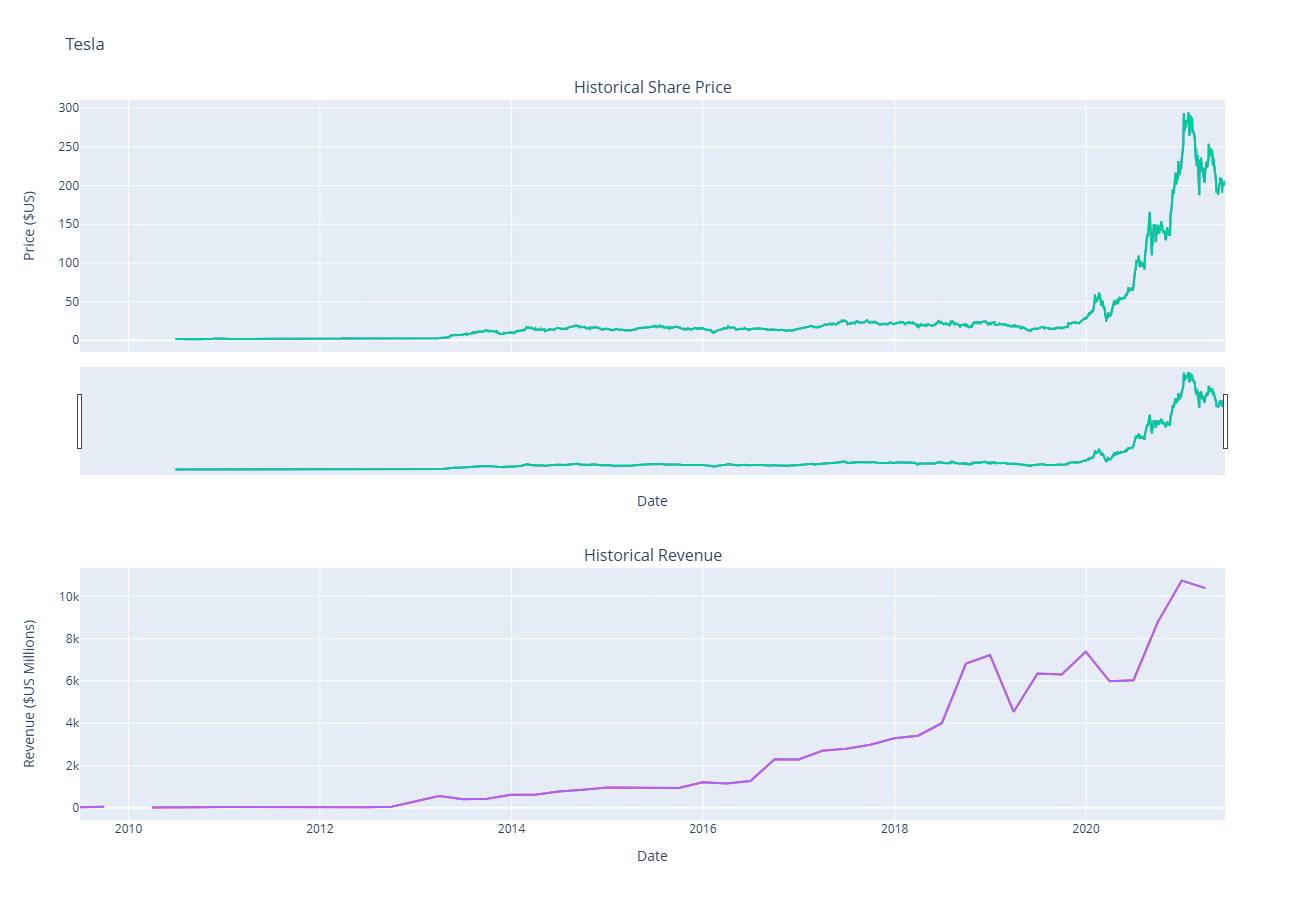

In [173]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

C:\Users\Shadr\AppData\Local\Temp\ipykernel_26068\3651764630.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Shadr\AppData\Local\Temp\ipykernel_26068\3651764630.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



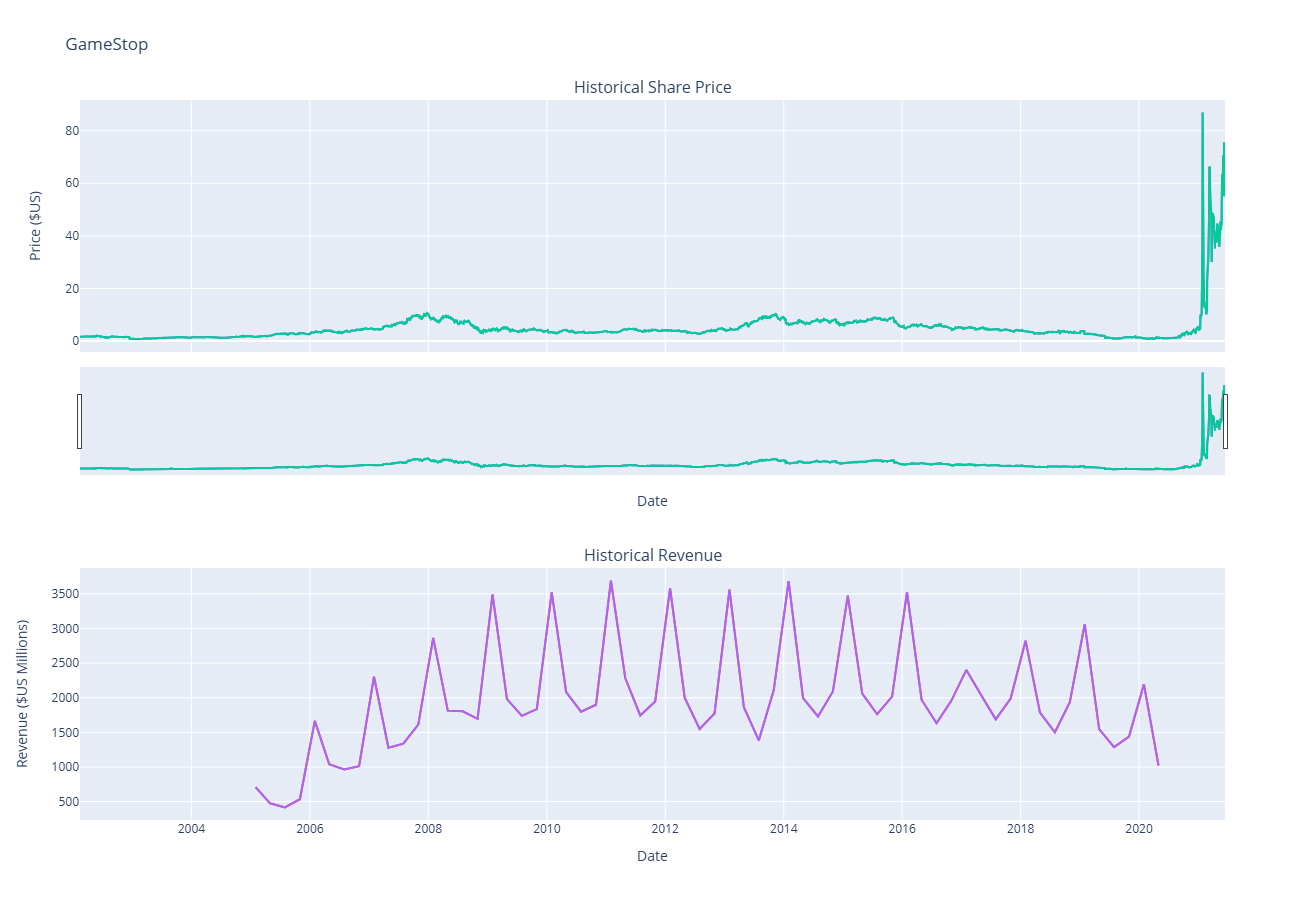

In [174]:
make_graph(gme_data, gme_revenue, 'GameStop')